# Predictive Maintanence for a Delivery Company

In this section, I am trying to develop a model that can predict the probability of a device failure. This dataset is taken from Kaggle.com.

About Dataset

A company has a fleet of devices transmitting daily sensor readings. They would like to create a predictive maintenance solution to proactively identify when maintenance should be performed. This approach promises cost savings over routine or time based preventive maintenance, because tasks are performed only when warranted.

The task is to build a predictive model using machine learning to predict the probability of a device failure. When building this model, be sure to minimize false positives and false negatives. The column you are trying to Predict is called failure with binary value 0 for non-failure and 1 for failure.

<img src='https://www.assemblymag.com/ext/resources/2022/06/01/396566134-sensing-insights-image-condition-monitoring-predictive-maintenance.jpg?1654104988' style='display: block; margin-left: auto; margin-right: auto;'>

<a href='https://www.kaggle.com/datasets/hiimanshuagarwal/predictive-maintenance-dataset/data' target= _blank> Can get data from this link

In [49]:
import pandas as pd
from imblearn.over_sampling import SMOTE #x, y = oversample.fit_resample(x, y)
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("failure.csv")

### EDA

In [30]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [31]:
df.shape 

(124494, 12)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [33]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
failure,124494.0,8.514467e-04,2.916725e-02,0.0,0.0,0.0,0.0,1.0
attribute1,124494.0,1.223868e+08,7.045960e+07,0.0,61276754.0,122795744.0,183308370.0,244140480.0
attribute2,124494.0,1.594848e+02,2.179658e+03,0.0,0.0,0.0,0.0,64968.0
attribute3,124494.0,9.940455e+00,1.857473e+02,0.0,0.0,0.0,0.0,24929.0
attribute4,124494.0,1.741120e+00,2.290851e+01,0.0,0.0,0.0,0.0,1666.0
attribute5,124494.0,1.422269e+01,1.594302e+01,1.0,8.0,10.0,12.0,98.0
attribute6,124494.0,2.601729e+05,9.915101e+04,8.0,221452.0,249799.5,310266.0,689161.0
attribute7,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
attribute8,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
attribute9,124494.0,1.245152e+01,1.914256e+02,0.0,0.0,0.0,0.0,18701.0


In [81]:
df["device"].value_counts()

device
S1F0FGBQ    304
W1F0SJJ2    304
Z1F0GE1M    304
Z1F0KJDS    304
Z1F0KKN4    304
           ... 
Z1F0LT6P      5
Z1F0LT6Z      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
Name: count, Length: 1168, dtype: int64

In [36]:
df["device"].nunique()

1168

In [82]:
df["failure"].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [38]:
df.corr(numeric_only=True)['failure']

failure       1.000000
attribute1    0.001984
attribute2    0.052902
attribute3   -0.000948
attribute4    0.067398
attribute5    0.002270
attribute6   -0.000550
attribute7    0.119055
attribute8    0.119055
attribute9    0.001622
Name: failure, dtype: float64

In [52]:
df['year'] = df['date'].str[:4].astype(int)
df['month'] = df['date'].str[5:7].astype(int)
df['day'] = df['date'].str[8:10].astype(int)


In [55]:
df['day_type'] = 'WD'
df.loc[pd.to_datetime(df['date']).dt.day_name().isin(['Saturday', 'Sunday']), 'day_type'] = 'WE'

In [59]:
# monday = 1 sunday = 7 and so on
df['day_of_week'] = pd.to_datetime(df['date']).dt.weekday + 1

In [62]:
df['dev_model'] = df['device'].str[0:3]

In [ ]:
df['dev_serie'] = df['device'].str[0:4]

In [41]:
df = df.drop('date', axis=1)

In [65]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day,day_type,day_of_week,dev_model
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,2015,11,2,WD,1,Z1F
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,2015,11,2,WD,1,Z1F
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,2015,11,2,WD,1,Z1F
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,2015,11,2,WD,1,Z1F
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0,2015,11,2,WD,1,Z1F


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


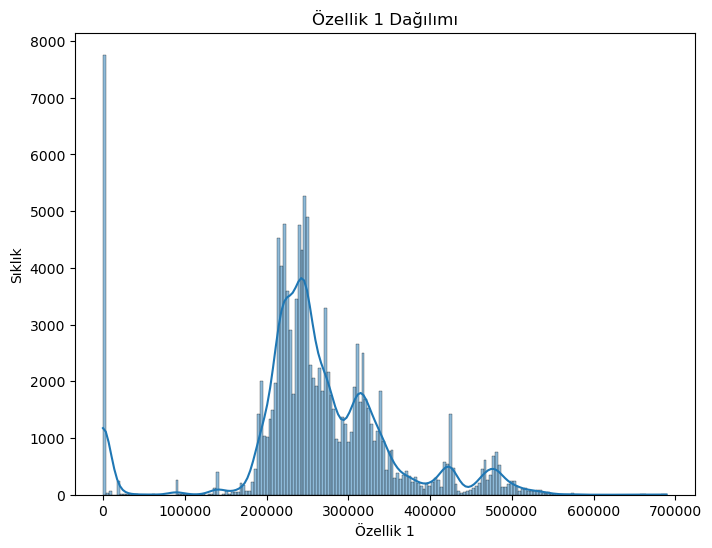

In [75]:
# Veri setinin genel dağılımını gösteren histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="attribute6", kde=True)
plt.title("Özellik 1 Dağılımı")
plt.xlabel("Özellik 1")
plt.ylabel("Sıklık")
plt.show()

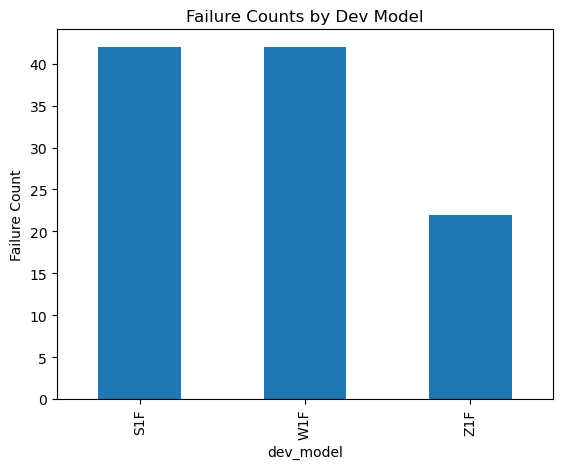

In [78]:
failure_counts = df.groupby('dev_model')['failure'].sum()

failure_counts.plot(kind='bar')
plt.xlabel('dev_model')
plt.ylabel('Failure Count')
plt.title('Failure Counts by Dev Model')
plt.show()

In [79]:
df["year"].value_counts()

year
2015    124494
Name: count, dtype: int64